# Looking only at images with comments at least with min_words = 50

In [1]:
from aestheval.data.datasets import AVA, Reddit, PCCD
import torch
from tqdm import tqdm
SPLITS = ('train', 'validation', 'test')

ava_dataset = [AVA(split, dataset_path="/media/data-storage/datasets/ava", load_images=False, min_words=100) for split in SPLITS]
reddit_dataset = [Reddit(split, dataset_path="/media/data-storage/datasets/reddit", load_images=False, min_words=100) for split in SPLITS]
pccd_dataset = [PCCD(split, dataset_path="/media/data-storage/datasets/PCCD", load_images=False, min_words=100) for split in SPLITS]

dataset = torch.utils.data.ConcatDataset(ava_dataset + reddit_dataset + pccd_dataset)

/home/daniel/anaconda3/envs/aestheval/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /home/daniel/anaconda3/envs/aestheval/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE
  warn(f"Failed to load image Python extension: {e}")


In [2]:
len(dataset)

35113

In [3]:
ncomments={
    'ava':[],
    'reddit': [],
    'pccd':[]
    }
nwords={
    'ava':[],
    'reddit': [],
    'pccd':[]
    }
sentiment_mean_score={
    'ava':[],
    'reddit': [],
    'pccd':[]
    }
sentiment_stdev_score={
    'ava':[],
    'reddit': [],
    'pccd':[]
}
sentiment_len_score={
    'ava':[],
    'reddit': [],
    'pccd':[]
}

comments={
    'ava':[],
    'reddit': [],
    'pccd':[]
}
for im, d in dataset:
    # print(d)
    ncomments[d['dataset_name']].append(len(d['comments']))
    nwords[d['dataset_name']].extend([len(x.split()) for x in d['comments']])
    sentiment_mean_score[d['dataset_name']].append(d['mean_score'])
    sentiment_stdev_score[d['dataset_name']].append(d['stdev_score'])
    sentiment_len_score[d['dataset_name']].append(d['number_of_scores'])
    comments[d['dataset_name']].extend(d['comments'])

count    14099.000000
mean         1.128449
std          0.452478
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         10.000000
Name: ava, dtype: float64
count    19600.000000
mean         1.252959
std          0.711507
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         26.000000
Name: reddit, dtype: float64
count    1414.000000
mean        1.502829
std         0.818872
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: pccd, dtype: float64


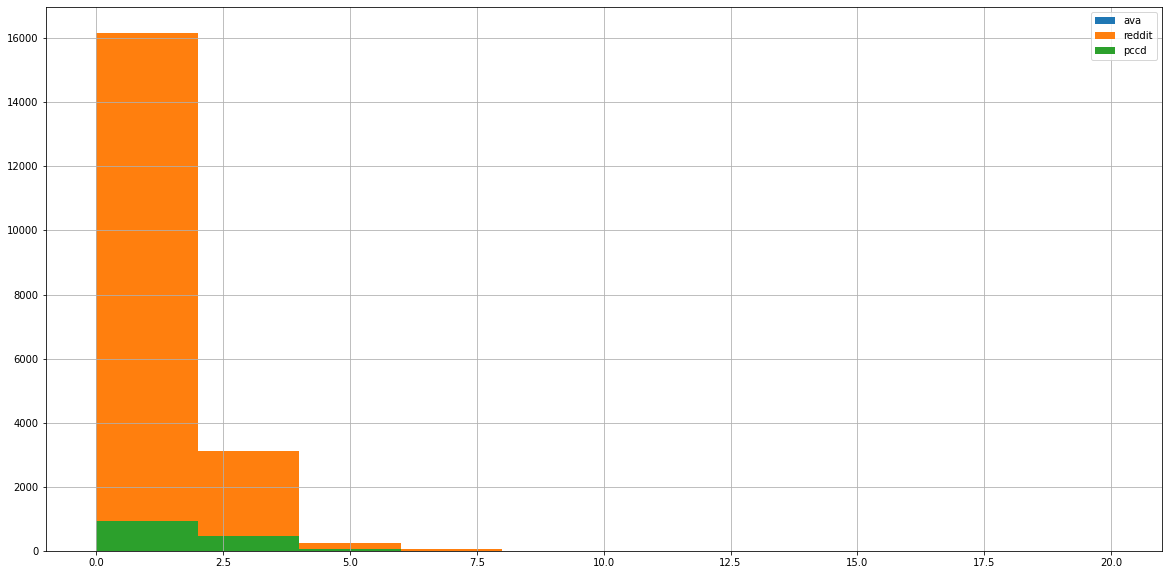

In [4]:
import pandas as pd
for name, data in ncomments.items():
    s = pd.Series(data, name=name)
    print(s.describe())
    s.hist(bins=10, range=[0, 20], figsize=(20,10), legend=True)

count    15910.000000
mean       131.814645
std         39.504323
min        101.000000
25%        108.000000
50%        120.000000
75%        142.000000
max       2146.000000
Name: ava, dtype: float64
count    24558.000000
mean       168.239026
std         83.617541
min        101.000000
25%        117.000000
50%        140.000000
75%        187.000000
max       1286.000000
Name: reddit, dtype: float64
count    2125.000000
mean      148.608471
std        56.712570
min       101.000000
25%       112.000000
50%       131.000000
75%       164.000000
max       780.000000
Name: pccd, dtype: float64


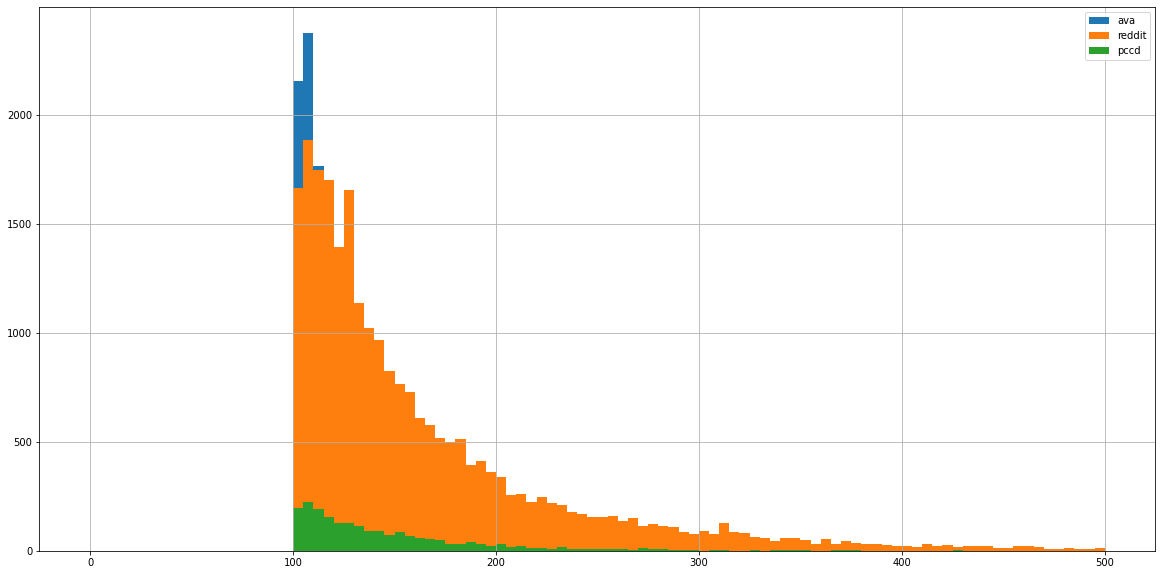

In [5]:
for name, data in nwords.items():
    s = pd.Series(data, name=name)
    print(s.describe())
    s.hist(bins=100, figsize=(20,10), legend=True, range=[0,500])

In [6]:
for i in range(5):
    print(dataset[i])


(None, {'im_id': '770638', 'im_score': 5.59523809524, 'query': 1004, 'im_name': '770638.jpg', 'comments': ["Let's start around a 5.5 image.  That's a good place because it is an image with promise that let us down.  I see you were hoping for more on this one too.  The choice of subject is good.  A very interesting building.  Your composition is at least not straight on, but it is a bit static in that there is little or no context for us (sometimes that can't be helped and I don't know what's there that I can't see).  The HDR is a good choice because it allowed you to keep detail in the sky, BUT I see two problems.  One, and I'm pretty sure you know this now, your colors are crazy.  I'm all about saturated colors, but not when they look unnatural.  We've hit that point here.  Two, the clouds in the sky are too lopsided.  You have half a blue sky and half with clouds.  I think that generally degrades the image and sometimes you just have to sit and wait until you get a better balance."],

count    14099.000000
mean         0.718745
std          0.148665
min          0.108604
25%          0.620801
50%          0.741494
75%          0.834703
max          0.985493
Name: ava, dtype: float64
count    19600.000000
mean         0.584389
std          0.213378
min          0.044429
25%          0.428779
50%          0.592263
75%          0.748613
max          0.987532
Name: reddit, dtype: float64
count    1414.000000
mean        0.735039
std         0.145274
min         0.108129
25%         0.648549
50%         0.758030
75%         0.844443
max         0.981085
Name: pccd, dtype: float64


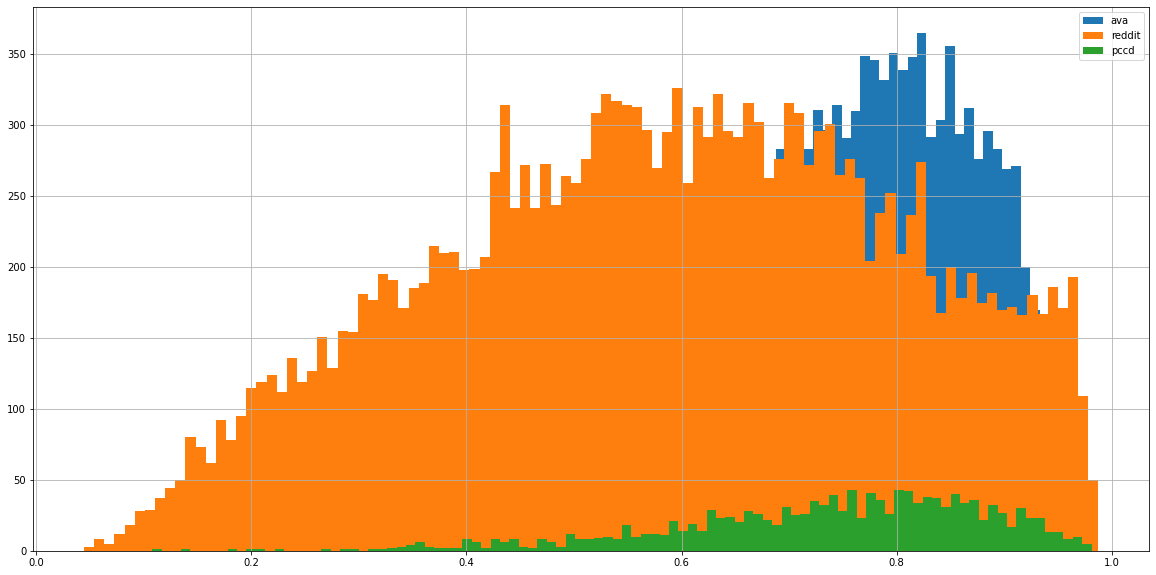

In [7]:
# Distribution of mean sentiment score per dataset

for name, data in sentiment_mean_score.items():
    s = pd.Series(data, name=name)
    print(s.describe())
    s.hist(bins=100, figsize=(20,10), legend=True)



count    14099.000000
mean         0.262003
std          0.072763
min          0.000000
25%          0.219341
50%          0.270730
75%          0.312641
max          0.606866
Name: ava, dtype: float64
count    19600.000000
mean         0.183762
std          0.148496
min          0.000000
25%          0.007362
50%          0.196809
75%          0.299990
max          0.643606
Name: reddit, dtype: float64
count    1414.000000
mean        0.225514
std         0.090040
min         0.007772
25%         0.161598
50%         0.234585
75%         0.291850
max         0.465051
Name: pccd, dtype: float64


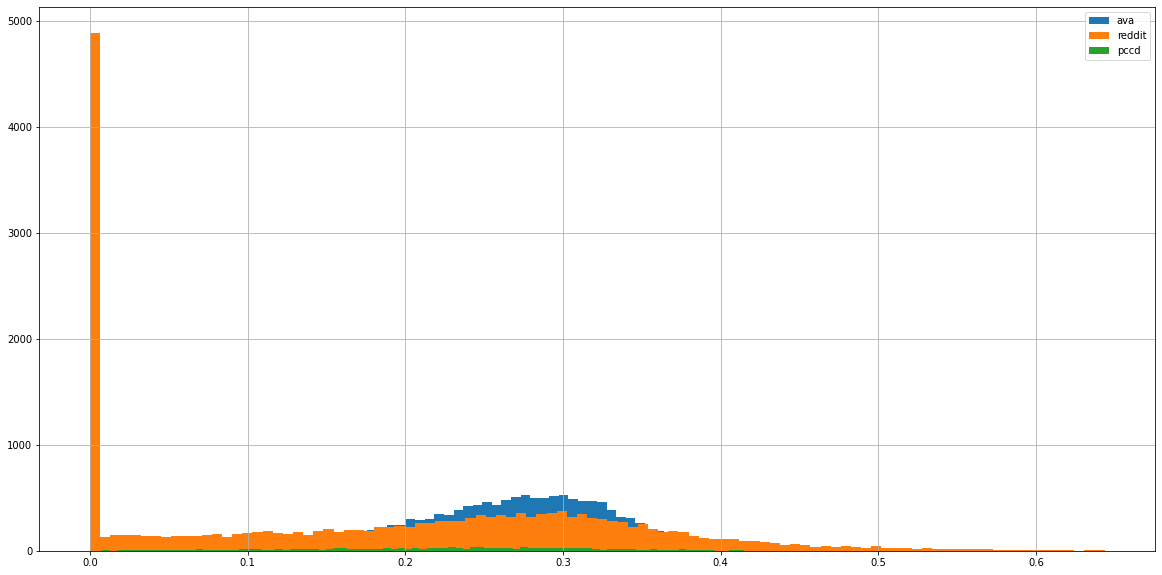

In [8]:
# Distribution of stdev sentiment score per dataset
# Reddit has a lot of images with only one comment, hence stdev=0
for name, data in sentiment_stdev_score.items():
    s = pd.Series(data, name=name)
    print(s.describe())
    s.hist(bins=100, figsize=(20,10), legend=True)

count    14099.000000
mean        22.925952
std         21.790987
min          1.000000
25%         11.000000
50%         17.000000
75%         26.000000
max        367.000000
Name: ava, dtype: float64
count    19600.000000
mean         4.404745
std          5.708205
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max        126.000000
Name: reddit, dtype: float64
count    1414.000000
mean        6.627298
std         0.615089
min         5.000000
25%         6.000000
50%         7.000000
75%         7.000000
max         7.000000
Name: pccd, dtype: float64


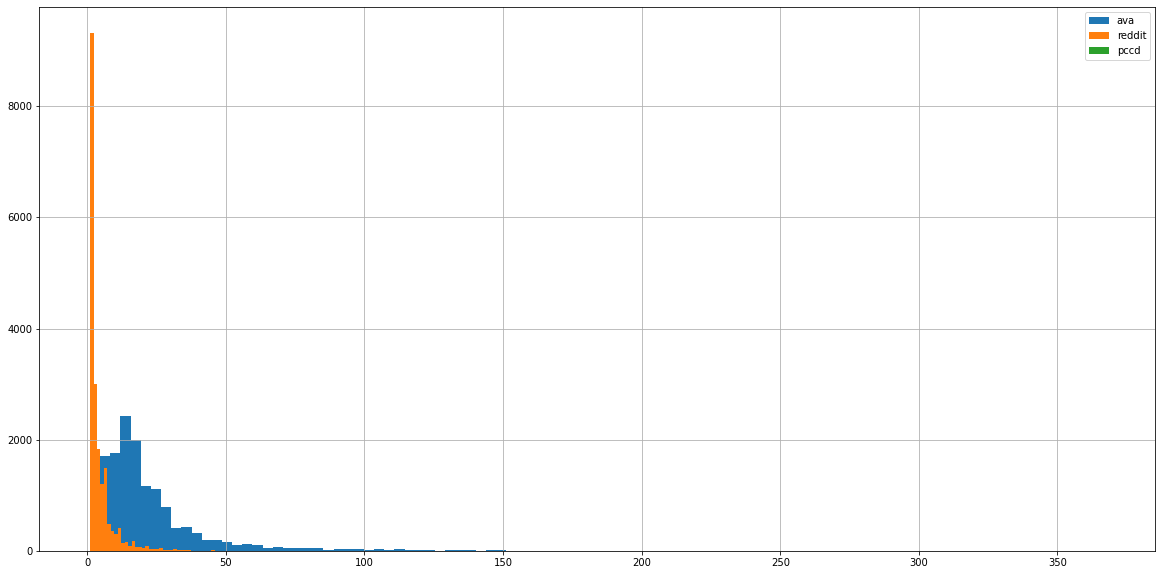

In [9]:
# Distribution of number of scores per dataset
# Reddit has a lot of images with only one comment, hence stdev=0
for name, data in sentiment_len_score.items():
    s = pd.Series(data, name=name)
    print(s.describe())
    s.hist(bins=100, figsize=(20,10), legend=True)

# BERTopic


In [21]:
from bertopic import BERTopic
from aestheval.data.datautils.data_cleaning import clean_text
topic_model = BERTopic()
topics, probs = topic_model.fit_transform([clean_text(comment) for comment in comments['ava']])

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

In [22]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,58176,-1_this_it_and_you
1,0,3159,0_tree_trees_branches_branch
2,1,3131,1_her_she_face_hair
3,2,2640,2_flower_flowers_petals_stem
4,3,2133,3_child_baby_boy_kids
...,...,...,...
621,625,10,625_recorder_music_instrument_microphone
620,626,10,626_shake_intruduced_astheticly_pastey
619,627,10,627_verry_judah_unhapy_diversity
617,623,10,623_yolk_yolks_grooves_yellow


In [23]:
topic_model.visualize_barchart(top_n_topics=24)

In [24]:
topic_model = BERTopic()
topics, probs = topic_model.fit_transform([clean_text(comment) for comment in comments['reddit']])

In [25]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,28715,-1_the_and_it_to
1,0,4767,0_her_she_face_hair
2,1,2340,1_tree_trees_branches_the
3,2,2067,2_his_him_he_hes
4,3,1138,3_bird_birds_feathers_wildlife
...,...,...,...
347,346,10,346_film_porta_interactions_400
348,347,10,347_bokeh_flower_flowers_dandelion
349,348,10,348_print_prints_printing_printed
350,349,10,349_tripod_tripods_hurting_backpack


In [26]:
topic_model.visualize_barchart(top_n_topics=24)

In [27]:
topic_model = BERTopic()
topics, probs = topic_model.fit_transform([clean_text(comment) for comment in comments['pccd']])

In [28]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,3381,-1_the_and_of_in
1,0,725,0_you_this_it_that
2,1,268,1_composition_the_subject_frame
3,2,208,2_depth_field_focus_aperture
4,3,154,3_iso_noise_speed_shutter
...,...,...,...
89,88,12,88_turtle_snail_turtles_sea
90,89,12,89_reflection_truck_reflector_rearview
91,90,12,90_building_shadows_lit_light
92,91,11,91_verticle_cropped_shot_lamp


In [29]:
topic_model.visualize_barchart(top_n_topics=24)